# Clustering Tracks

## Processing Data

In [1]:
# Import libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

In [3]:
# Read the csv file into a pandas DataFrame
tracks_features_df = pd.read_csv(Path("Resources/track_features.csv"))

# Review the DataFrame
tracks_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,mode_minor,mode_major,time_signature_0,time_signature_1,time_signature_2,time_signature_3,time_signature_4,time_signature_5,time_signature_6,time_signature_7
0,0.359,0.387,1,-11.947,1,0.0325,0.76900,0.000003,0.3290,0.291,...,0,1,0,0,0,0,1,0,0,0
1,0.752,0.542,8,-7.178,0,0.0653,0.42900,0.000000,0.1040,0.908,...,1,0,0,0,0,0,1,0,0,0
2,0.772,0.412,4,-11.682,1,0.0305,0.37800,0.000199,0.1840,0.605,...,0,1,0,0,0,0,1,0,0,0
3,0.479,0.624,0,-6.608,0,0.0471,0.48900,0.000098,0.0694,0.895,...,1,0,0,0,0,0,1,0,0,0
4,0.418,0.816,1,-7.200,1,0.1240,0.00371,0.001640,0.2640,0.834,...,0,1,0,0,0,0,1,0,0,0


In [4]:
tracks_features_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'track_uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'key_none', 'key_0', 'key_1', 'key_2', 'key_3',
       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'mode_minor', 'mode_major', 'time_signature_0',
       'time_signature_1', 'time_signature_2', 'time_signature_3',
       'time_signature_4', 'time_signature_5', 'time_signature_6',
       'time_signature_7'],
      dtype='object')

In [5]:
# Get rid of the `Unnamed: 0` column
tracks_features_df = tracks_features_df.drop(['key','mode','id', 'track_uri', 'track_href', 'analysis_url','time_signature',],axis=1)
# Check out the df
tracks_features_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,mode_minor,mode_major,time_signature_0,time_signature_1,time_signature_2,time_signature_3,time_signature_4,time_signature_5,time_signature_6,time_signature_7
0,0.359,0.387,-11.947,0.0325,0.76900,0.000003,0.3290,0.291,88.005,392360,...,0,1,0,0,0,0,1,0,0,0
1,0.752,0.542,-7.178,0.0653,0.42900,0.000000,0.1040,0.908,75.546,244768,...,1,0,0,0,0,0,1,0,0,0
2,0.772,0.412,-11.682,0.0305,0.37800,0.000199,0.1840,0.605,108.352,217246,...,0,1,0,0,0,0,1,0,0,0
3,0.479,0.624,-6.608,0.0471,0.48900,0.000098,0.0694,0.895,192.164,367293,...,1,0,0,0,0,0,1,0,0,0
4,0.418,0.816,-7.200,0.1240,0.00371,0.001640,0.2640,0.834,184.122,234027,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214987,0.828,0.800,-6.074,0.2580,0.15400,0.000000,0.4160,0.845,143.143,184213,...,1,0,0,0,0,0,1,0,0,0
2214988,0.214,0.390,-17.410,0.0349,0.00474,0.897000,0.1440,0.412,175.466,188657,...,1,0,0,0,0,0,1,0,0,0
2214989,0.715,0.452,-10.099,0.1260,0.44300,0.000000,0.1120,0.675,154.790,302240,...,1,0,0,0,0,0,1,0,0,0
2214990,0.688,0.941,-3.814,0.0939,0.00435,0.000002,0.6210,0.492,115.054,223920,...,1,0,0,0,0,0,1,0,0,0


In [6]:
tracks_features_df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'key_none', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_minor',
       'mode_major', 'time_signature_0', 'time_signature_1',
       'time_signature_2', 'time_signature_3', 'time_signature_4',
       'time_signature_5', 'time_signature_6', 'time_signature_7'],
      dtype='object')

## Scaling

In [7]:
# Import libraries and dependencies
from sklearn.preprocessing import StandardScaler

In [9]:
# Creating `scaler` 
scaler = StandardScaler()
# Scale the `tracks_features_df` and drop the 'track_uri' column
scaler.fit(tracks_features_df)
scaled_tracks = scaler.transform(tracks_features_df)

In [10]:
# Create `scaled_tracks_df` for the scaled_tracks
scaled_tracks_df = pd.DataFrame(scaled_tracks,columns=tracks_features_df.columns, index=tracks_features_df.index)
# Check out `scaled_tracks_df`
scaled_tracks_df


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,mode_minor,mode_major,time_signature_0,time_signature_1,time_signature_2,time_signature_3,time_signature_4,time_signature_5,time_signature_6,time_signature_7
0,-1.037319,-0.743887,-0.406352,-0.492501,1.168990,-0.631995,0.631518,-0.684138,-1.069131,0.926736,...,-0.725791,0.725791,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
1,1.092400,-0.161227,0.441205,-0.207726,0.209605,-0.632003,-0.553770,1.601254,-1.485563,-0.017122,...,1.377808,-1.377808,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
2,1.200783,-0.649909,-0.359255,-0.509866,0.065697,-0.631433,-0.132334,0.478930,-0.389049,-0.193126,...,-0.725791,0.725791,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
3,-0.387023,0.147018,0.542507,-0.365742,0.378908,-0.631721,-0.736041,1.553102,2.412299,0.766431,...,1.377808,-1.377808,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
4,-0.717590,0.868764,0.437295,0.301916,-0.990444,-0.627309,0.289102,1.327155,2.143501,-0.085811,...,-0.725791,0.725791,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214987,1.504254,0.808619,0.637410,1.465325,-0.566368,-0.632003,1.089830,1.367900,0.773812,-0.404374,...,1.377808,-1.377808,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
2214988,-1.823093,-0.732610,-1.377247,-0.471664,-0.987538,1.935209,-0.343052,-0.235949,1.854182,-0.375954,...,1.377808,-1.377808,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
2214989,0.891892,-0.499546,-0.077921,0.319281,0.249109,-0.632003,-0.511627,0.738213,1.163103,0.350414,...,1.377808,-1.377808,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0
2214990,0.745575,1.338651,1.039062,0.040583,-0.988638,-0.631996,2.169760,0.060374,-0.165041,-0.150445,...,1.377808,-1.377808,-0.03769,-0.103107,0.0,-0.335807,0.389518,-0.137138,0.0,0.0


## Finding K Value
* Elbow Method

In [11]:
# Import libraries and dependencies
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import hvplot.pandas
import time

In [12]:
# Set up the KMeans model where k is the number for clusters ranging from 1 to 20
start_time = time.time()

inertias =[]
k = list(range(1,20))

for i in k:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(scaled_tracks_df)
    inertias.append(kmeans.inertia_)

print("--- %s seconds ---" % (time.time() - start_time))

--- 223.58393692970276 seconds ---


In [13]:
# Create elbow_df and sil_score_df
elbow_df = pd.DataFrame({
    "k": k,
    "inertia": inertias
})
# Check out `elbow_df`
elbow_df

,k,inertia
0,1,6.423477e+07
1,2,5.870211e+07
2,3,5.500971e+07
3,4,5.230376e+07
4,5,5.055121e+07
5,6,4.898147e+07
6,7,4.655089e+07
7,8,4.453442e+07
8,9,4.370183e+07
9,10,4.179589e+07


In [14]:
# Plot elbow curve
elbow_df.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

## Clustering 

In [34]:
# Initialize the K-Means model with n_clusters=8
model = KMeans(n_clusters=11)

# Fit the model for the scaled_tracks_df 
model.fit(scaled_tracks_df)

# Predict the clusters of tracks
tracks_clusters = model.predict(scaled_tracks_df)

# View the tracks clusters
print(tracks_clusters)

/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 6 7 ... 5 2 2]


In [35]:
# Create a copy of the scaled_tracks_df
clustered_scaled_tracks_df = scaled_tracks_df.copy()

# Create a new column "track_cluster" for the predicted clusters
clustered_scaled_tracks_df["track_cluster"] = tracks_clusters

# Review the DataFrame
clustered_scaled_tracks_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_minor,mode_major,track_cluster
0,0.219920,0.511650,-0.916348,0.302226,0.725791,-0.507261,-0.945325,-0.631304,-0.485287,-0.154460,...,-0.30389,-0.251311,-0.375159,-0.253174,-0.341612,-0.269082,-0.282417,-0.725791,0.725791,2
1,-0.820554,1.391278,1.612534,1.066076,-1.377808,-0.060998,-0.993576,0.444108,1.137242,0.753029,...,-0.30389,-0.251311,-0.375159,-0.253174,-0.341612,-0.269082,3.540868,1.377808,-1.377808,6
2,0.122375,1.240915,-1.197335,1.066787,0.725791,-0.312781,1.281859,0.238045,0.605179,1.045648,...,-0.30389,-0.251311,-0.375159,-0.253174,-0.341612,-0.269082,-0.282417,-0.725791,0.725791,7
3,-0.316574,0.812378,-0.916348,0.352166,0.725791,-0.464718,-0.975630,-0.631659,-0.116530,0.056670,...,-0.30389,-0.251311,-0.375159,-0.253174,-0.341612,-0.269082,-0.282417,-0.725791,0.725791,2
4,-1.795998,-0.819069,-1.478322,-0.006299,-1.377808,-0.527230,-0.796056,-0.631987,-0.663344,-1.365681,...,-0.30389,-0.251311,-0.375159,-0.253174,-0.341612,-0.269082,-0.282417,1.377808,-1.377808,9


## Visualization Of Clustering

In [36]:
# Import libraries and dependencies
from sklearn.manifold import TSNE
import seaborn as sns

In [37]:
# Create a copy of `clustered_scaled_tracks_df`
visual_cluster_df = clustered_scaled_tracks_df.copy()

In [38]:
# Create a TSNE model
m = TSNE(learning_rate=50)

In [39]:
# Fit the data
tsne_features = m.fit_transform(scaled_tracks_df)

In [40]:
# Create the X and y for the data
visual_cluster_df["X"] = tsne_features[:,0]
visual_cluster_df["y"] = tsne_features[:,1]

/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


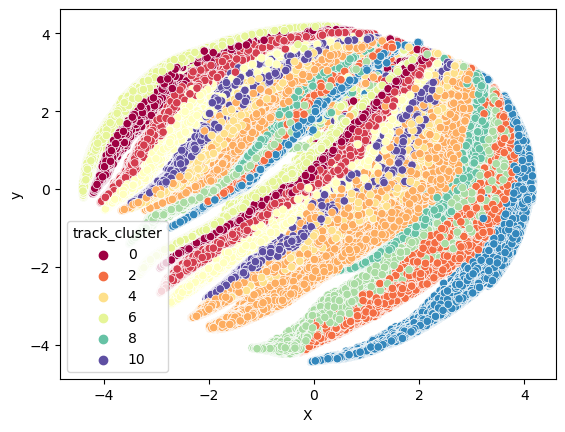

In [41]:
# Plot the clustering result
sns.scatterplot(x="X", y="y", hue='track_cluster', palette='Spectral', data=visual_cluster_df)
plt.show()

### Cluster = 13

In [42]:
# Initialize the K-Means model with n_clusters=8
model = KMeans(n_clusters=13)

# Fit the model for the scaled_tracks_df 
model.fit(scaled_tracks_df)

# Predict the clusters of tracks
tracks_clusters = model.predict(scaled_tracks_df)

# View the tracks clusters
print(tracks_clusters)

/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 2 7 ... 1 0 0]


In [43]:
# Create a copy of the scaled_tracks_df
clustered_scaled_tracks_df = scaled_tracks_df.copy()

# Create a new column "track_cluster" for the predicted clusters
clustered_scaled_tracks_df["track_cluster"] = tracks_clusters

# Review the DataFrame
clustered_scaled_tracks_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_minor,mode_major,track_cluster
0,0.219920,0.511650,-0.916348,0.302226,0.725791,-0.507261,-0.945325,-0.631304,-0.485287,-0.154460,...,-0.30389,-0.251311,-0.375159,-0.253174,-0.341612,-0.269082,-0.282417,-0.725791,0.725791,0
1,-0.820554,1.391278,1.612534,1.066076,-1.377808,-0.060998,-0.993576,0.444108,1.137242,0.753029,...,-0.30389,-0.251311,-0.375159,-0.253174,-0.341612,-0.269082,3.540868,1.377808,-1.377808,2
2,0.122375,1.240915,-1.197335,1.066787,0.725791,-0.312781,1.281859,0.238045,0.605179,1.045648,...,-0.30389,-0.251311,-0.375159,-0.253174,-0.341612,-0.269082,-0.282417,-0.725791,0.725791,7
3,-0.316574,0.812378,-0.916348,0.352166,0.725791,-0.464718,-0.975630,-0.631659,-0.116530,0.056670,...,-0.30389,-0.251311,-0.375159,-0.253174,-0.341612,-0.269082,-0.282417,-0.725791,0.725791,0
4,-1.795998,-0.819069,-1.478322,-0.006299,-1.377808,-0.527230,-0.796056,-0.631987,-0.663344,-1.365681,...,-0.30389,-0.251311,-0.375159,-0.253174,-0.341612,-0.269082,-0.282417,1.377808,-1.377808,4


/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


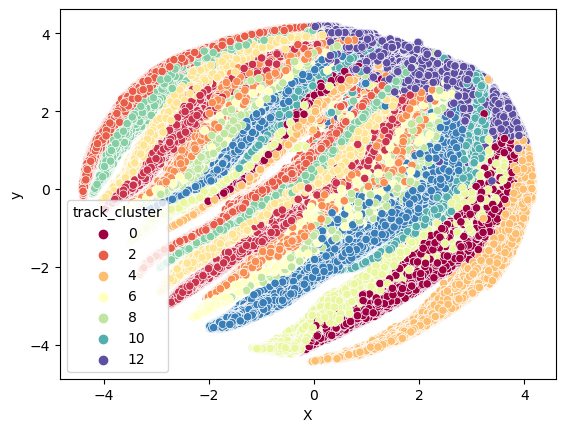

In [44]:
# Import libraries and dependencies
from sklearn.manifold import TSNE
import seaborn as sns
# Create a copy of `clustered_scaled_tracks_df`
visual_cluster_df = clustered_scaled_tracks_df.copy()
# Create a TSNE model
m = TSNE(learning_rate=50)
# Fit the data
tsne_features = m.fit_transform(scaled_tracks_df)
# Create the X and y for the data
visual_cluster_df["X"] = tsne_features[:,0]
visual_cluster_df["y"] = tsne_features[:,1]
# Plot the clustering result
sns.scatterplot(x="X", y="y", hue='track_cluster', palette='Spectral', data=visual_cluster_df)
plt.show()

## Clustering Input Playlist

In [20]:
# Process the input playlist data
# Read the csv file into a pandas DataFrame
input_playlist_mean_df = pd.read_csv(Path("Resources/test_input_playlist_mean.csv"))
input_playlist_df = pd.read_csv(Path("Resources/test_input_playlist.csv"))
# Review the DataFrame
input_playlist_mean_df.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_minor,mode_major
0,0,0.4548,0.7518,3.2,-6.531,0.6,0.04608,0.182572,0.136074,0.22724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.6


In [21]:
# Delete the 'Unnamed: 0' column
input_playlist_mean_df = input_playlist_mean_df.drop('Unnamed: 0',axis=1)
# Checkout the df
input_playlist_mean_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_minor,mode_major
0,0.4548,0.7518,3.2,-6.531,0.6,0.04608,0.182572,0.136074,0.22724,0.4938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.6


In [22]:
# Get the df for the input list
input_playlist_df

,Unnamed: 0,track_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_minor,mode_major
0,0,spotify:track:6KaZC1JpPRq9CNZ3X8jBCM,0.591,0.721,2,-7.960,1,0.0308,0.01970,0.000244,...,0,0,0,0,0,0,0,0,0,1
1,1,spotify:track:7hiqCnFcOBFAqZSf3AOY8a,0.399,0.955,11,-3.662,0,0.0822,0.00260,0.376000,...,0,0,0,0,0,0,0,1,1,0
2,2,spotify:track:1SxVwlqUaz6PdQSqjclahn,0.573,0.915,1,-3.658,1,0.0532,0.80900,0.304000,...,0,0,0,0,0,0,0,0,0,1
3,3,spotify:track:1XGX6lvmT464sVpJKTF3aV,0.492,0.801,2,-7.679,1,0.0357,0.00896,0.000120,...,0,0,0,0,0,0,0,0,0,1
4,4,spotify:track:317d1IqYa8JhV8BGVDtgwZ,0.219,0.367,0,-9.696,0,0.0285,0.07260,0.000006,...,0,0,0,0,0,0,0,0,1,0


In [23]:
# Delete the 'Unnamed: 0' column
input_playlist_df =input_playlist_df.drop('Unnamed: 0',axis=1)
# Checkout the df
input_playlist_df

,track_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_minor,mode_major
0,spotify:track:6KaZC1JpPRq9CNZ3X8jBCM,0.591,0.721,2,-7.960,1,0.0308,0.01970,0.000244,0.1170,...,0,0,0,0,0,0,0,0,0,1
1,spotify:track:7hiqCnFcOBFAqZSf3AOY8a,0.399,0.955,11,-3.662,0,0.0822,0.00260,0.376000,0.4250,...,0,0,0,0,0,0,0,1,1,0
2,spotify:track:1SxVwlqUaz6PdQSqjclahn,0.573,0.915,1,-3.658,1,0.0532,0.80900,0.304000,0.3240,...,0,0,0,0,0,0,0,0,0,1
3,spotify:track:1XGX6lvmT464sVpJKTF3aV,0.492,0.801,2,-7.679,1,0.0357,0.00896,0.000120,0.1870,...,0,0,0,0,0,0,0,0,0,1
4,spotify:track:317d1IqYa8JhV8BGVDtgwZ,0.219,0.367,0,-9.696,0,0.0285,0.07260,0.000006,0.0832,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Cluster the new input playlist
input_playlist_cluster = model.predict(scaled_input_playlist_df)
input_playlist_cluster[0]

## Recommend User's Song

In [ ]:
# Label the tracks in `tracks_features_df`
tracks_features_df["cluster"]=clustered_scaled_tracks_df["track_cluster"]
# Get all the tracks of the wanted cluster
recommend_tracks_df = tracks_features_df[tracks_features_df["cluster"]==input_playlist_cluster[0]]
recommend_tracks_df

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Create recommend_songs_df, and get all of the songs in playlist_cluster 2 
recommend_songs_df = recommend_playlist[['track_uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms_y', 'time_signature',
       'playlist_clusters']]
# Check out the df
recommend_songs_df


In [ ]:
# Create scaled_recommend_songs_df, and scale all of the songs in playlist_cluster 2 
scaler = StandardScaler()
scaled_recommend_songs = scaler.fit_transform(recommend_songs_df.drop(columns=['track_uri','playlist_clusters'],axis=1))
scaled_recommend_songs_df = pd.DataFrame(scaled_input_playlist, columns=recommend_songs_df.drop(columns=['track_uri','playlist_clusters'],axis=1).columns,index=recommend_songs_df.index)

scaled_recommend_songs_df

In [ ]:
# Compare similarity of to scaled_input_playlist_df
# Using cosine similarity
recommend_songs_df['similarity'] = cosine_similarity(scaled_recommend_songs_df.values, scaled_input_playlist_df.values)
recommend_songs_df_top_100 = recommend_songs_df.sort_values('similarity', ascending=False).head(100)
recommend_songs_df_top_100

## Save The Model

In [ ]:
import pickle

In [ ]:
# # save the song classification model as a pickle file
model_pkl_file = "track_cluster17_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
# # save the nearest neighbor model as a pickle file
# neigh_pkl_file = "song_neighbor.pkl"  

# with open(neigh_pkl_file, 'wb') as file:  
#     pickle.dump(neigh, file)
